# Actividad 4.3

## Importamos Librerías

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Cargamos el Archivo en un DataFrame

In [70]:
dfc = pd.read_csv('DataAnalyticsCat.csv')
dfn = pd.read_csv('DataAnalyticsNum.csv')
dfc = dfc.drop(columns=['Unnamed: 0'])
dfn = dfn.drop(columns=['Unnamed: 0'])

## Preprocesamiento Nulos

In [71]:
#Eliminar columna fecha
dfn = dfn.drop(columns=['fecha'])
dfc = dfc.drop(columns=['fecha'])

In [72]:
#Verificamos Nulos
dfc.isnull().sum()

administrador                        0
usuario                              0
presionó botón correcto              0
tiempo de interacción                0
mini juego                           0
número de interacción por lección    0
color presionado                     0
dificultad                           0
juego                                0
auto push                            0
tiempo de lección                    0
tiempo de sesión                     0
dtype: int64

In [73]:
#Verificamos Nulos
dfn.isnull().sum()

administrador                        0
usuario                              0
presionó botón correcto              0
tiempo de interacción                0
mini juego                           0
número de interacción por lección    0
color presionado                     0
dificultad                           0
juego                                0
auto push                            0
tiempo de lección                    0
tiempo de sesión                     0
dtype: int64

## Analizar la correlación logística que existe entre las variables dicotómicas

### HeatMap

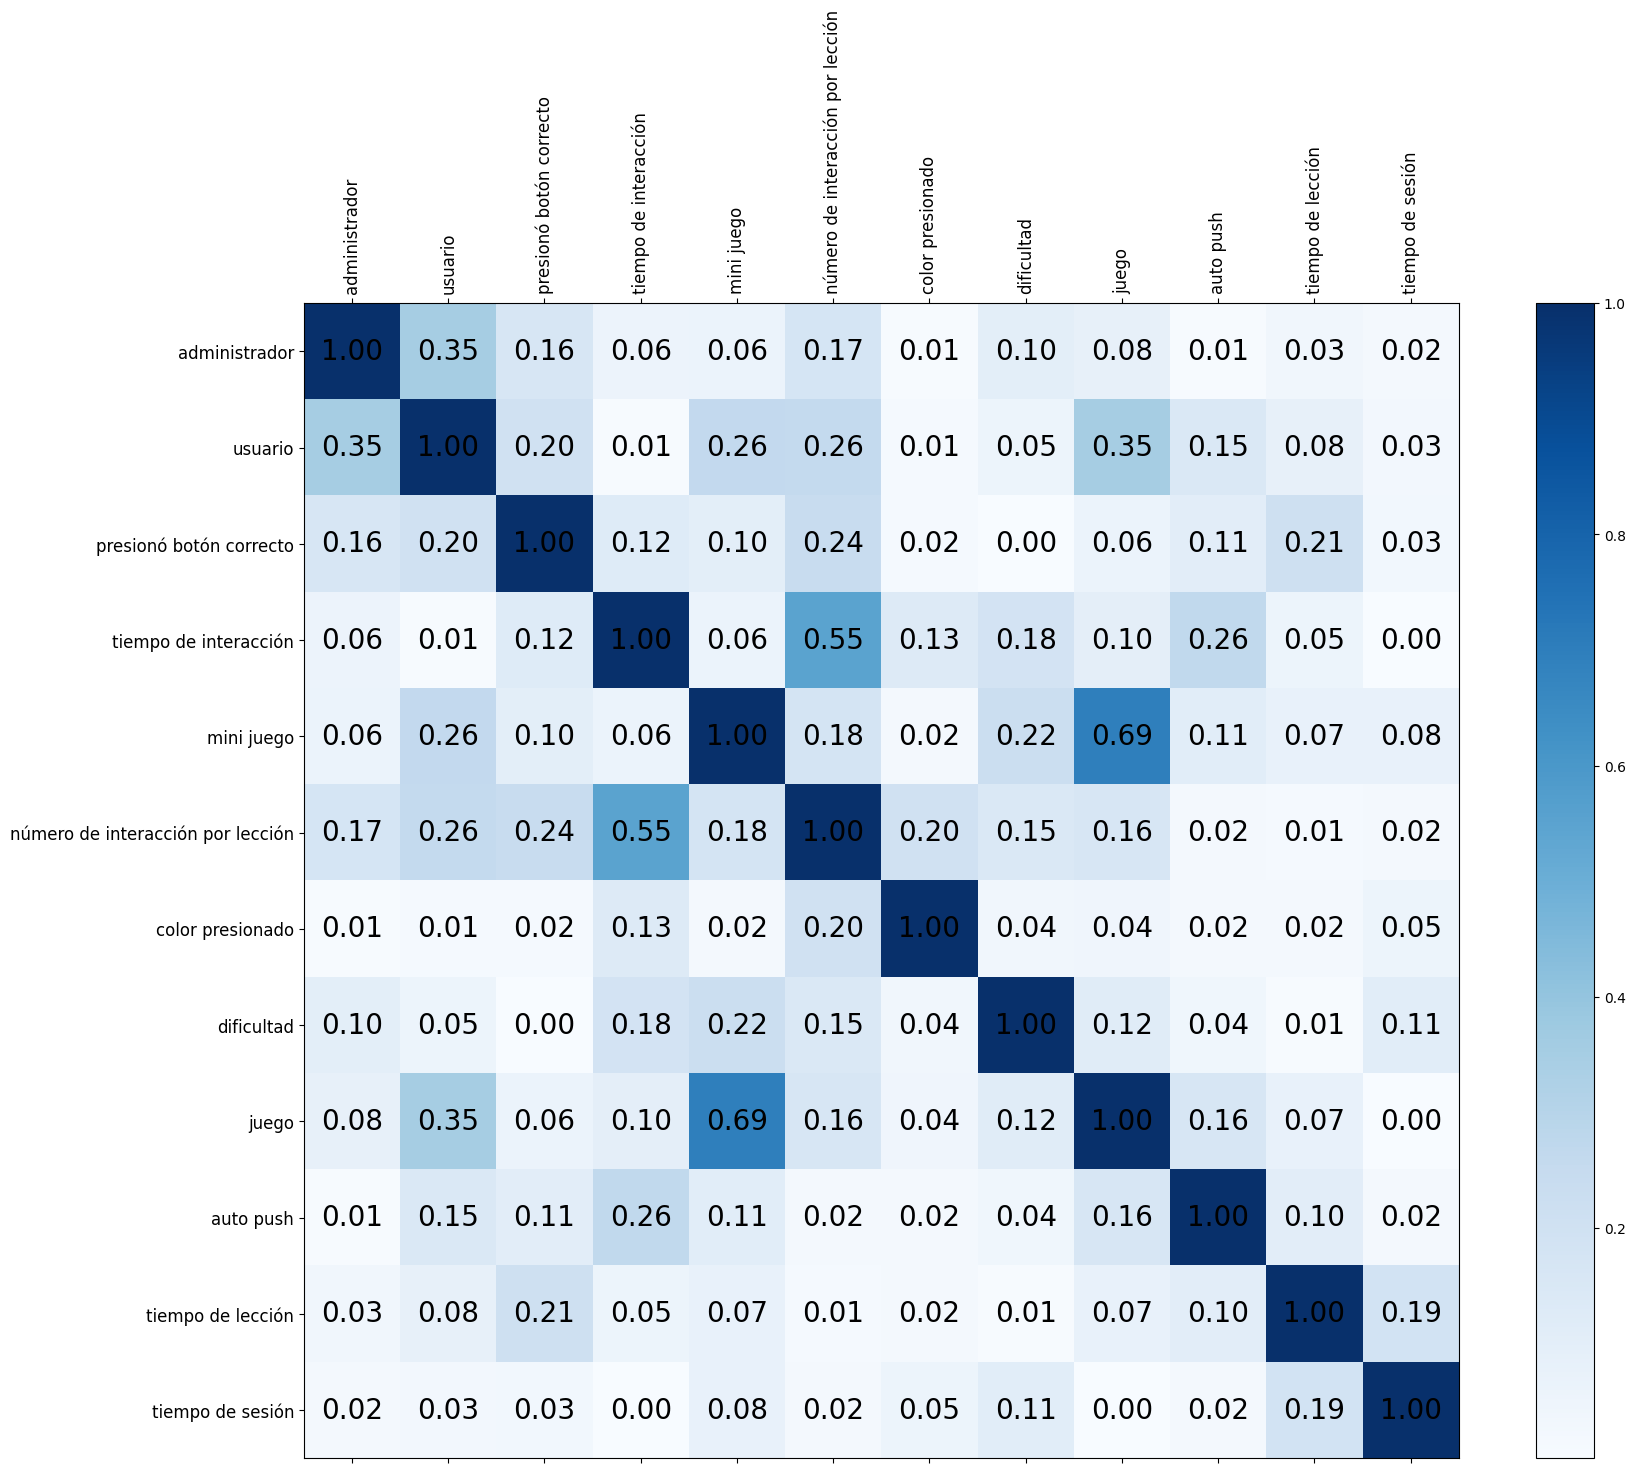

In [74]:
Corr_Factors = dfn.corr()
Corr_Factors = abs(Corr_Factors)
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(Corr_Factors, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(Corr_Factors.shape[0]):
    for j in range(Corr_Factors.shape[1]):
        ax.text(j, i, f"{Corr_Factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(Corr_Factors.columns)), Corr_Factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(Corr_Factors.index)), Corr_Factors.index, fontsize=12)
plt.show()

## Función Regresión Logística

In [75]:
def analisis_metricas(Vars_Indep, Var_Dep):
    #Redefinimos las variables
    X= Vars_Indep
    y= Var_Dep

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= None)

    #Se escalan todos los datos
    escalar = StandardScaler()

    #Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)

    #Definimos el algoritmo a utilizar
    from sklearn.linear_model import LogisticRegression
    algoritmo = LogisticRegression()

    #Entrenamos el modelo
    algoritmo.fit(X_train, y_train)

    #Realizamos una predicción
    y_pred = algoritmo.predict(X_test)

    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred)
    True_Positive = matriz[0, 0]
    True_Negative = matriz[1, 1]
    False_Positive = matriz[0, 1]
    False_Negative = matriz[1, 0]

    #Graficar Matriz de Confusión
    plt.figure(figsize=(10, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.text(1, 1, f'True Negatives: {True_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(1, 0, f'False Positives: {False_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 1, f'False Negatives: {False_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 0, f'True Positives: {True_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.show()

    #Defino el objetivo a calcular
    y_objetivo = np.unique(y)
    objetivo1 = y_objetivo[0]
    objetivo2 = y_objetivo[1]
    
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision1 = precision_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'Precisión del modelo {objetivo1}:') 
    print(round(precision1, 4))

    precision2 = precision_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'Precisión del modelo {objetivo2}:') 
    print(round(precision2, 4))

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score

    exactitud = accuracy_score(y_test, y_pred)
    print('Exactitud del modelo:')
    print(round(exactitud, 4))

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad1 = recall_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'Sensibilidad del modelo {objetivo1}:')
    print(round(sensibilidad1, 4))

    sensibilidad2 = recall_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'Sensibilidad del modelo {objetivo2}:')
    print(round(sensibilidad2, 4))

    #Calculo el F1 Score del modelo
    from sklearn.metrics import f1_score
    f1_1 = f1_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'F1 Score del modelo {objetivo1}:')
    print(round(f1_1, 4))

    f1_2 = f1_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'F1 Score del modelo {objetivo2}:')
    print(round(f1_2, 4))

## Función Regresión Logística Reponderación de Clases

In [76]:
def reponderacion_clases(Vars_Indep, Var_Dep):
    #Redefinimos las variables
    X= Vars_Indep
    y= Var_Dep

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= None)

    #Se escalan todos los datos
    escalar = StandardScaler()

    #Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)

    #Definimos el algoritmo a utilizar
    from sklearn.linear_model import LogisticRegression
    algoritmo_Pond = LogisticRegression(class_weight='balanced')

    #Entrenamos el modelo
    algoritmo_Pond.fit(X_train, y_train)

    #Realizamos una predicción
    y_pred_pond = algoritmo_Pond.predict(X_test)

    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred_pond)
    True_Positive = matriz[0, 0]
    True_Negative = matriz[1, 1]
    False_Positive = matriz[0, 1]
    False_Negative = matriz[1, 0]

    #Graficar Matriz de Confusión
    plt.figure(figsize=(10, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.text(1, 1, f'True Negatives: {True_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(1, 0, f'False Positives: {False_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 1, f'False Negatives: {False_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 0, f'True Positives: {True_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.show()

    #Defino el objetivo a calcular
    y_objetivo = np.unique(y)
    objetivo1 = y_objetivo[0]
    objetivo2 = y_objetivo[1]
    
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision1 = precision_score(y_test, y_pred_pond, average='binary', pos_label=objetivo1)
    print(f'Precisión del modelo {objetivo1}:') 
    print(round(precision1, 4))

    precision2 = precision_score(y_test, y_pred_pond, average='binary', pos_label=objetivo2)
    print(f'Precisión del modelo {objetivo2}:') 
    print(round(precision2, 4))

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score

    exactitud = accuracy_score(y_test, y_pred_pond)
    print('Exactitud del modelo:')
    print(round(exactitud, 4))

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad1 = recall_score(y_test, y_pred_pond, average='binary', pos_label=objetivo1)
    print(f'Sensibilidad del modelo {objetivo1}:')
    print(round(sensibilidad1, 4))

    sensibilidad2 = recall_score(y_test, y_pred_pond, average='binary', pos_label=objetivo2)
    print(f'Sensibilidad del modelo {objetivo2}:')
    print(round(sensibilidad2, 4))

    #Calculo el F1 Score del modelo
    from sklearn.metrics import f1_score
    f1_1 = f1_score(y_test, y_pred_pond, average='binary', pos_label=objetivo1)
    print(f'F1 Score del modelo {objetivo1}:')
    print(round(f1_1, 4))

    f1_2 = f1_score(y_test, y_pred_pond, average='binary', pos_label=objetivo2)
    print(f'F1 Score del modelo {objetivo2}:')
    print(round(f1_2, 4))

## Función Regresión Logística Reponderación de Oversampling

In [77]:
def oversampling(Vars_Indep, Var_Dep):
    #Redefinimos las variables
    X= Vars_Indep
    y= Var_Dep

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= None)

    #Se escalan todos los datos
    escalar = StandardScaler()

    #Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)

    #Aplicamos la técnica de sobremuestreo (oversampling)
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    #Definimos el algoritmo a utilizar
    from sklearn.linear_model import LogisticRegression
    algoritmo_Over_sampling = LogisticRegression()

    #Entrenamos el modelo
    algoritmo_Over_sampling.fit(X_resampled, y_resampled)

    #Realizamos una predicción
    y_pred_over_sampling = algoritmo_Over_sampling.predict(X_test)

    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred_over_sampling)
    True_Positive = matriz[0, 0]
    True_Negative = matriz[1, 1]
    False_Positive = matriz[0, 1]
    False_Negative = matriz[1, 0]

    #Graficar Matriz de Confusión
    plt.figure(figsize=(10, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.text(1, 1, f'True Negatives: {True_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(1, 0, f'False Positives: {False_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 1, f'False Negatives: {False_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 0, f'True Positives: {True_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.show()

    #Defino el objetivo a calcular
    y_objetivo = np.unique(y)
    objetivo1 = y_objetivo[0]
    objetivo2 = y_objetivo[1]
    
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision1 = precision_score(y_test, y_pred_over_sampling, average='binary', pos_label=objetivo1)
    print(f'Precisión del modelo {objetivo1}:') 
    print(round(precision1, 4))

    precision2 = precision_score(y_test, y_pred_over_sampling, average='binary', pos_label=objetivo2)
    print(f'Precisión del modelo {objetivo2}:') 
    print(round(precision2, 4))

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score

    exactitud = accuracy_score(y_test, y_pred_over_sampling)
    print('Exactitud del modelo:')
    print(round(exactitud, 4))

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad1 = recall_score(y_test, y_pred_over_sampling, average='binary', pos_label=objetivo1)
    print(f'Sensibilidad del modelo {objetivo1}:')
    print(round(sensibilidad1, 4))

    sensibilidad2 = recall_score(y_test, y_pred_over_sampling, average='binary', pos_label=objetivo2)
    print(f'Sensibilidad del modelo {objetivo2}:')
    print(round(sensibilidad2, 4))

    #Calculo el F1 Score del modelo
    from sklearn.metrics import f1_score
    f1_1 = f1_score(y_test, y_pred_over_sampling, average='binary', pos_label=objetivo1)
    print(f'F1 Score del modelo {objetivo1}:')
    print(round(f1_1, 4))

    f1_2 = f1_score(y_test, y_pred_over_sampling, average='binary', pos_label=objetivo2)
    print(f'F1 Score del modelo {objetivo2}:')
    print(round(f1_2, 4))

## Modelo Botón Correcto

In [78]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de lección', 'usuario']]
Var_Dep = dfc['presionó botón correcto']

### Regresión Logística Sin Ajuste

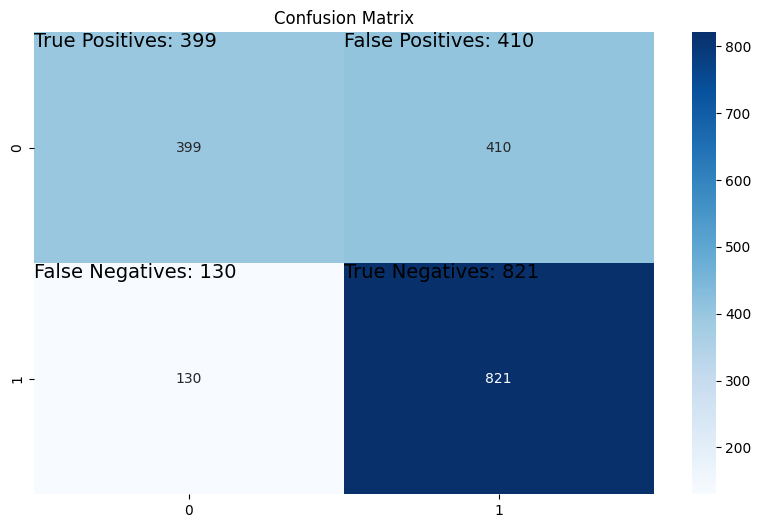

Precisión del modelo No:
0.7543
Precisión del modelo Si:
0.6669
Exactitud del modelo:
0.6932
Sensibilidad del modelo No:
0.4932
Sensibilidad del modelo Si:
0.8633
F1 Score del modelo No:
0.5964
F1 Score del modelo Si:
0.7525


In [79]:
boton_correcto_sin_ajuste = analisis_metricas(Vars_Indep, Var_Dep)
boton_correcto_sin_ajuste

### Regresión Logística Reponderación de Clases

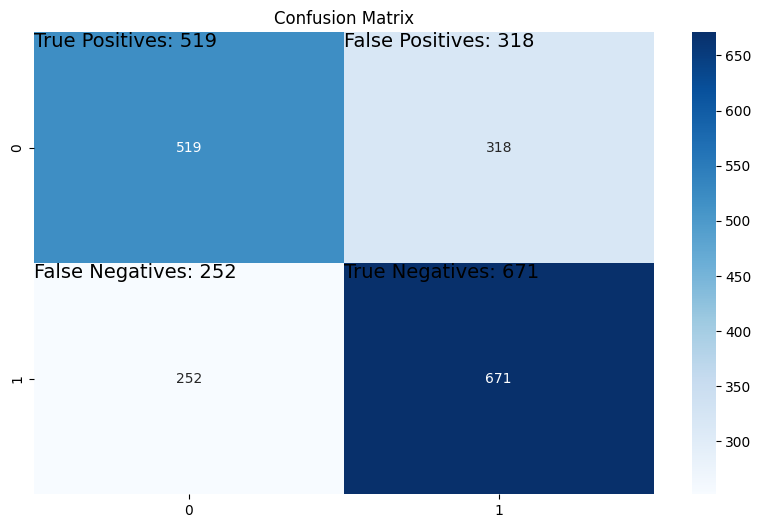

Precisión del modelo No:
0.6732
Precisión del modelo Si:
0.6785
Exactitud del modelo:
0.6761
Sensibilidad del modelo No:
0.6201
Sensibilidad del modelo Si:
0.727
F1 Score del modelo No:
0.6455
F1 Score del modelo Si:
0.7019


In [80]:
boton_correcto_reponderado = reponderacion_clases(Vars_Indep, Var_Dep)
boton_correcto_reponderado

### Regresión Logísitca Oversampling

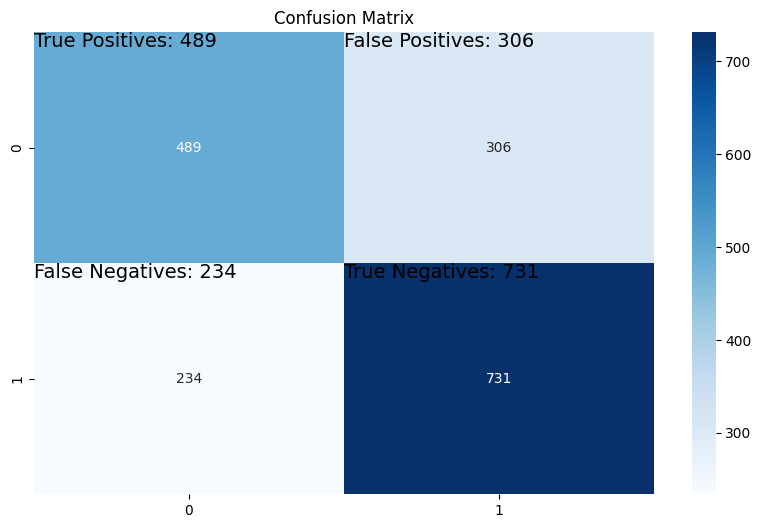

Precisión del modelo No:
0.6763
Precisión del modelo Si:
0.7049
Exactitud del modelo:
0.6932
Sensibilidad del modelo No:
0.6151
Sensibilidad del modelo Si:
0.7575
F1 Score del modelo No:
0.6443
F1 Score del modelo Si:
0.7303


In [81]:
boton_correcto_oversampling = oversampling(Vars_Indep, Var_Dep)
boton_correcto_oversampling

## Modelo Juego

In [82]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['tiempo de interacción', 'mini juego', 'número de interacción por lección']]
Var_Dep = dfc['juego']

### Regresión Logística Sin Ajuste

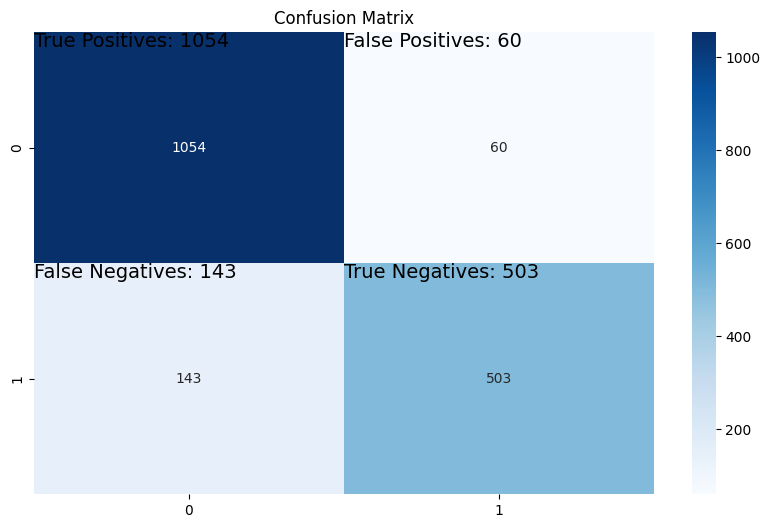

Precisión del modelo Astro:
0.8805
Precisión del modelo Cadetes:
0.8934
Exactitud del modelo:
0.8847
Sensibilidad del modelo Astro:
0.9461
Sensibilidad del modelo Cadetes:
0.7786
F1 Score del modelo Astro:
0.9122
F1 Score del modelo Cadetes:
0.8321


In [83]:
juego_sin_ajuste = analisis_metricas(Vars_Indep, Var_Dep)
juego_sin_ajuste

### Regresión Logística Reponderación de Clases

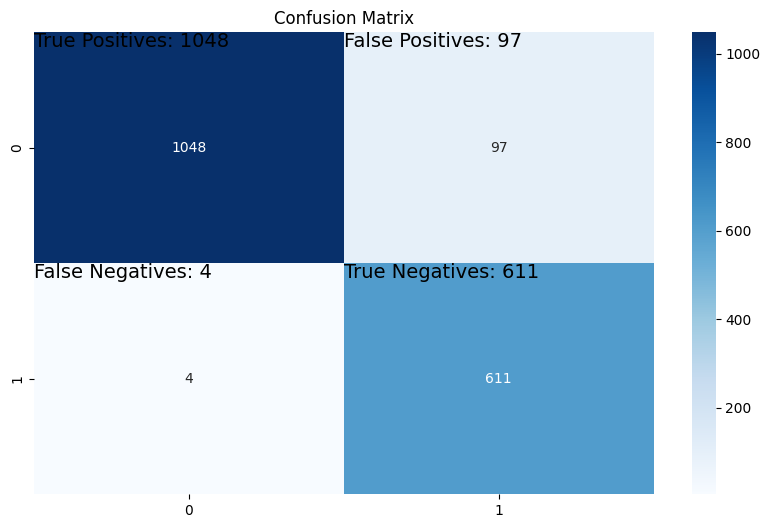

Precisión del modelo Astro:
0.9962
Precisión del modelo Cadetes:
0.863
Exactitud del modelo:
0.9426
Sensibilidad del modelo Astro:
0.9153
Sensibilidad del modelo Cadetes:
0.9935
F1 Score del modelo Astro:
0.954
F1 Score del modelo Cadetes:
0.9237


In [84]:
juego_reponderado = reponderacion_clases(Vars_Indep, Var_Dep)
juego_reponderado

### Regresión Logística Oversampling

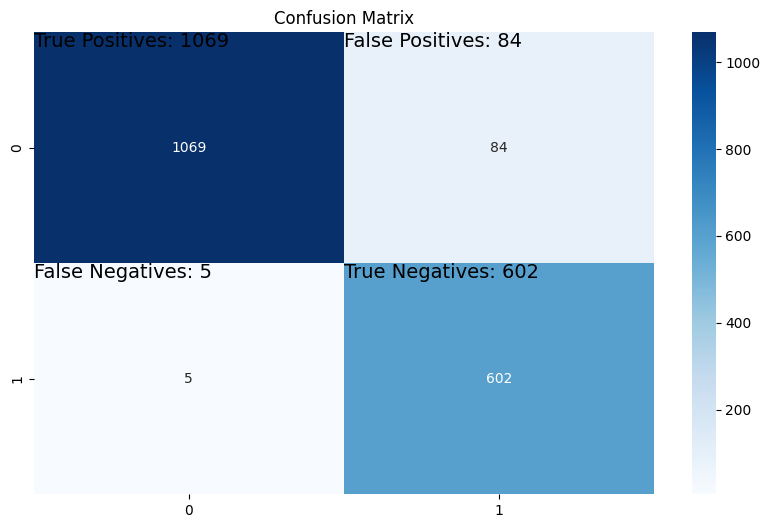

Precisión del modelo Astro:
0.9953
Precisión del modelo Cadetes:
0.8776
Exactitud del modelo:
0.9494
Sensibilidad del modelo Astro:
0.9271
Sensibilidad del modelo Cadetes:
0.9918
F1 Score del modelo Astro:
0.96
F1 Score del modelo Cadetes:
0.9312


In [85]:
juego_oversampling = oversampling(Vars_Indep, Var_Dep)
juego_oversampling

## Modelo Auto Push

In [86]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['mini juego', 'usuario', 'usuario']]
Var_Dep = dfc['auto push']

### Regresión Logística Sin Ajuste

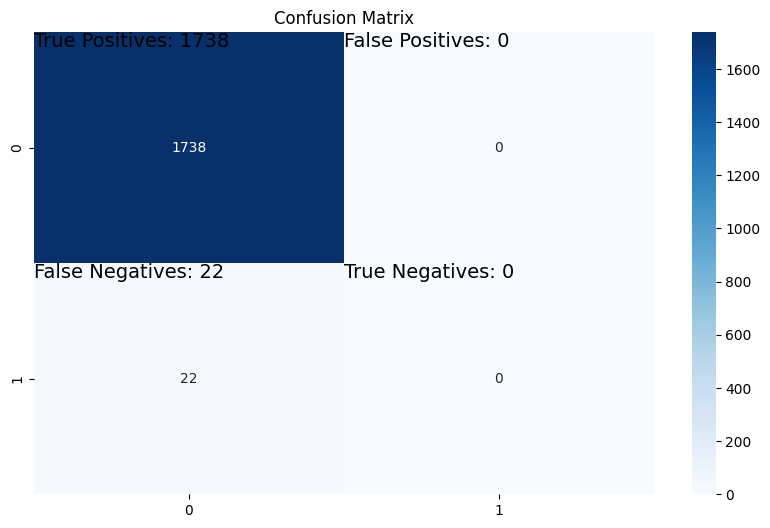

Precisión del modelo No:
0.9875
Precisión del modelo Si:
0.0
Exactitud del modelo:
0.9875
Sensibilidad del modelo No:
1.0
Sensibilidad del modelo Si:
0.0
F1 Score del modelo No:
0.9937
F1 Score del modelo Si:
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
autopush_sin_ajuste = analisis_metricas(Vars_Indep, Var_Dep)
autopush_sin_ajuste

### Regresión Logística Reponderación de Clases

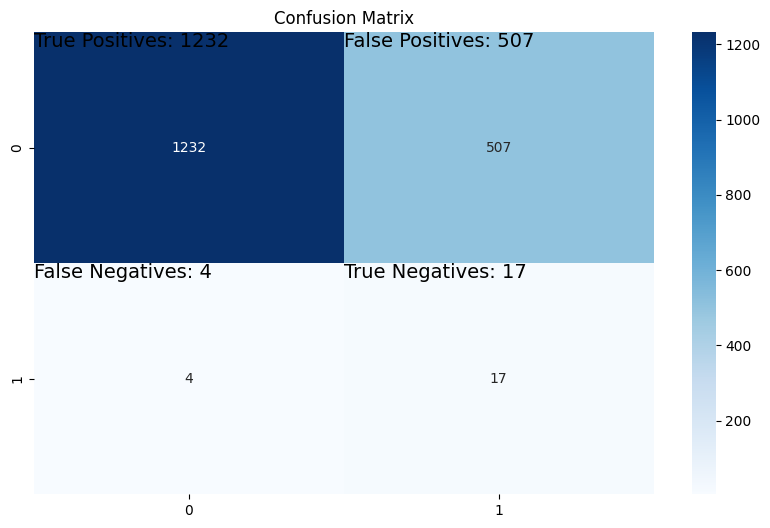

Precisión del modelo No:
0.9968
Precisión del modelo Si:
0.0324
Exactitud del modelo:
0.7097
Sensibilidad del modelo No:
0.7085
Sensibilidad del modelo Si:
0.8095
F1 Score del modelo No:
0.8282
F1 Score del modelo Si:
0.0624


In [88]:
autopush_reponderado = reponderacion_clases(Vars_Indep, Var_Dep)
autopush_reponderado

### Regresión Logística Oversampling

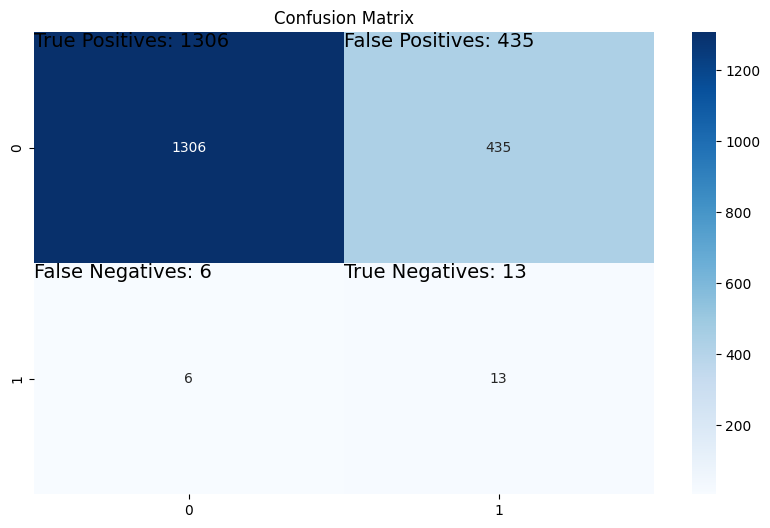

Precisión del modelo No:
0.9954
Precisión del modelo Si:
0.029
Exactitud del modelo:
0.7494
Sensibilidad del modelo No:
0.7501
Sensibilidad del modelo Si:
0.6842
F1 Score del modelo No:
0.8556
F1 Score del modelo Si:
0.0557


In [89]:
autopush_oversampling = oversampling(Vars_Indep, Var_Dep)
autopush_oversampling

## Modelo Color Presionado (Blue)

In [90]:
#Volvemos variables a dicotómicas
blue = dfc['color presionado'].replace(['green', 'red', 'violet', 'yellow'], 'no blue')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'tiempo de sesión']]
Var_Dep = blue

### Regresión Logística Sin Ajuste

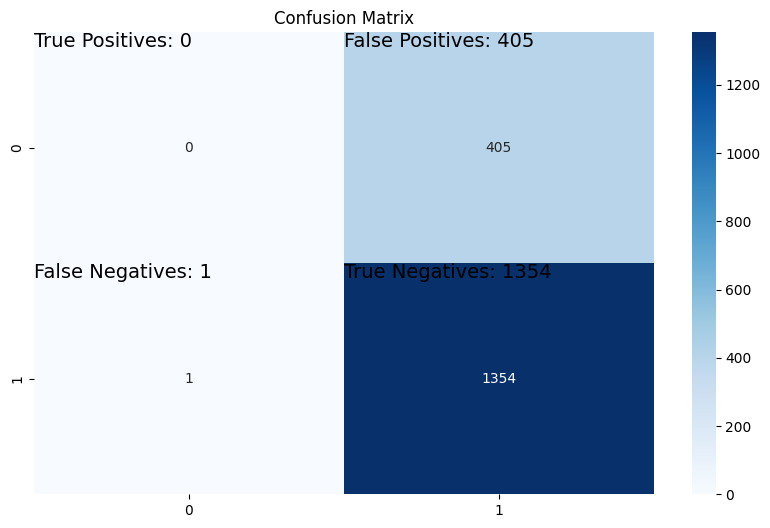

Precisión del modelo blue:
0.0
Precisión del modelo no blue:
0.7698
Exactitud del modelo:
0.7693
Sensibilidad del modelo blue:
0.0
Sensibilidad del modelo no blue:
0.9993
F1 Score del modelo blue:
0.0
F1 Score del modelo no blue:
0.8696


In [91]:
color_blue_sin_ajuste = analisis_metricas(Vars_Indep, Var_Dep)
color_blue_sin_ajuste

### Regresión Logística Reponderación de Clases

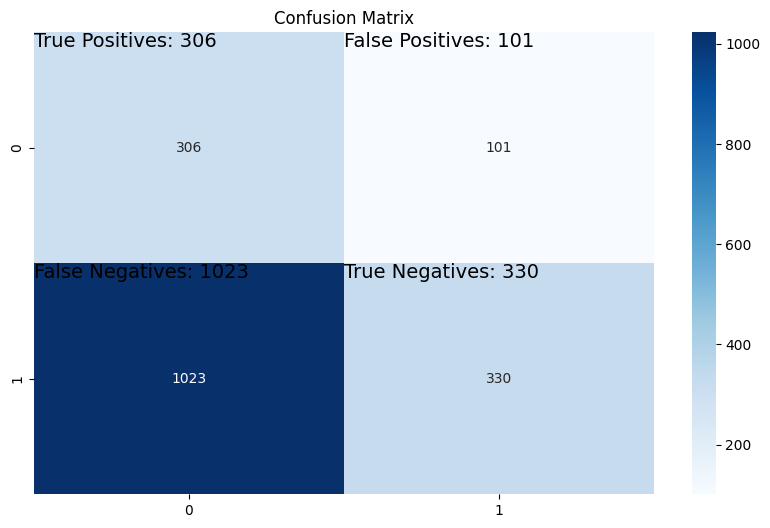

Precisión del modelo blue:
0.2302
Precisión del modelo no blue:
0.7657
Exactitud del modelo:
0.3614
Sensibilidad del modelo blue:
0.7518
Sensibilidad del modelo no blue:
0.2439
F1 Score del modelo blue:
0.3525
F1 Score del modelo no blue:
0.37


In [92]:
color_blue_reponderado = reponderacion_clases(Vars_Indep, Var_Dep)
color_blue_reponderado

### Regresión Logística Oversampling

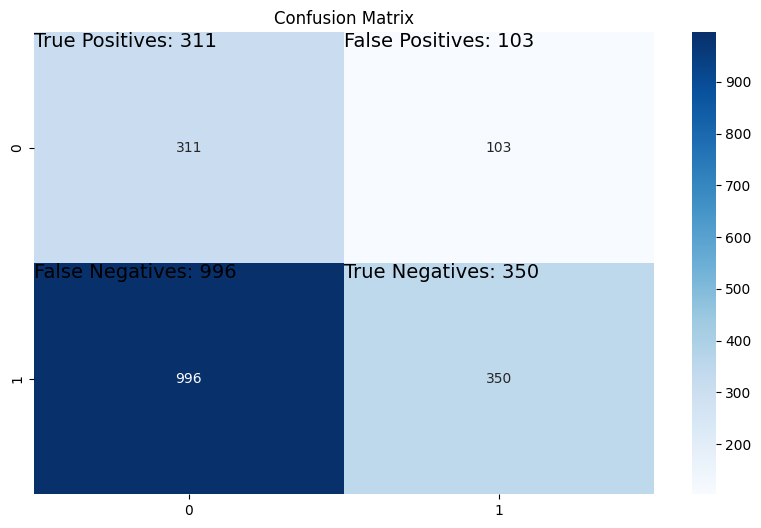

Precisión del modelo blue:
0.2379
Precisión del modelo no blue:
0.7726
Exactitud del modelo:
0.3756
Sensibilidad del modelo blue:
0.7512
Sensibilidad del modelo no blue:
0.26
F1 Score del modelo blue:
0.3614
F1 Score del modelo no blue:
0.3891


In [93]:
color_blue_oversampling = oversampling(Vars_Indep, Var_Dep)
color_blue_oversampling

## Modelo Dificutad (Episodio 3)

In [94]:
#Volvemos variables a dicotómicas
episodio_3 = dfc['dificultad'].replace(['Episodio 1', 'Episodio 2', 'Episodio 4'], 'No Episodio 3')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['número de interacción por lección', 'tiempo de interacción', 'mini juego']]
Var_Dep = episodio_3

### Regresión Logística Sin Ajuste

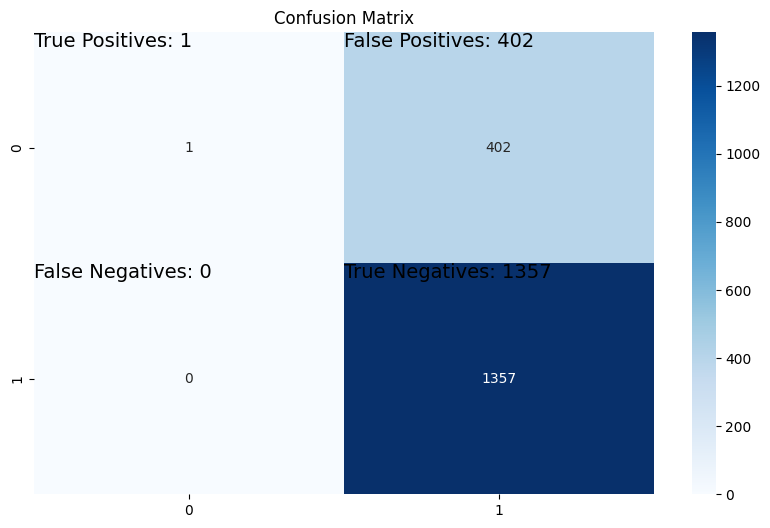

Precisión del modelo Episodio 3:
1.0
Precisión del modelo No Episodio 3:
0.7715
Exactitud del modelo:
0.7716
Sensibilidad del modelo Episodio 3:
0.0025
Sensibilidad del modelo No Episodio 3:
1.0
F1 Score del modelo Episodio 3:
0.005
F1 Score del modelo No Episodio 3:
0.871


In [95]:
dificultad_3_sin_ajuste = analisis_metricas(Vars_Indep, Var_Dep)
dificultad_3_sin_ajuste

### Regresión Logística Reponderación de Clases

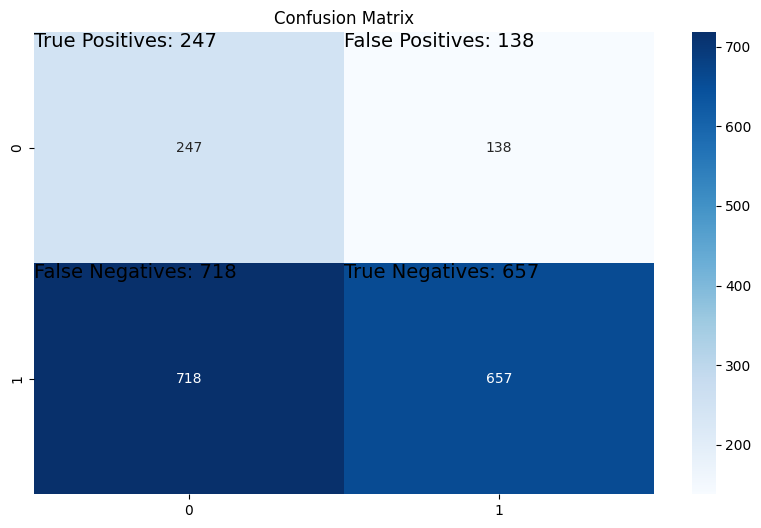

Precisión del modelo Episodio 3:
0.256
Precisión del modelo No Episodio 3:
0.8264
Exactitud del modelo:
0.5136
Sensibilidad del modelo Episodio 3:
0.6416
Sensibilidad del modelo No Episodio 3:
0.4778
F1 Score del modelo Episodio 3:
0.3659
F1 Score del modelo No Episodio 3:
0.6055


In [96]:
dificultad_3_reponderado = reponderacion_clases(Vars_Indep, Var_Dep)
dificultad_3_reponderado

### Regresión Logística Oversampling

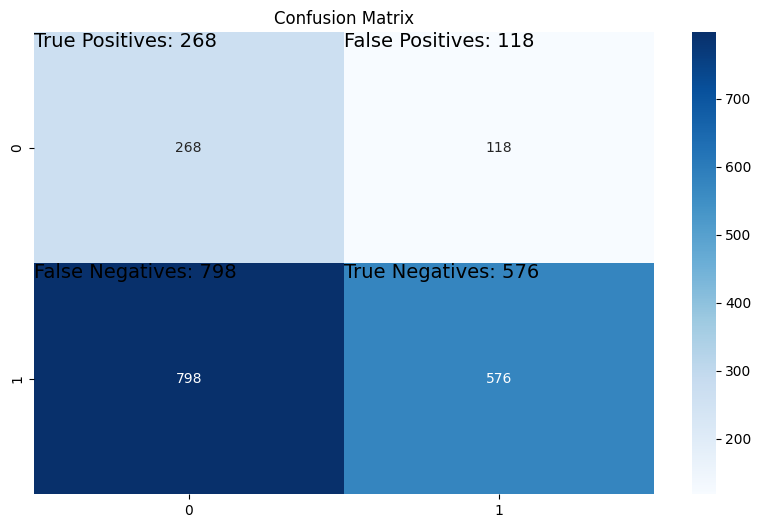

Precisión del modelo Episodio 3:
0.2514
Precisión del modelo No Episodio 3:
0.83
Exactitud del modelo:
0.4795
Sensibilidad del modelo Episodio 3:
0.6943
Sensibilidad del modelo No Episodio 3:
0.4192
F1 Score del modelo Episodio 3:
0.3691
F1 Score del modelo No Episodio 3:
0.5571


In [97]:
dificultad_3_oversampling = oversampling(Vars_Indep, Var_Dep)
dificultad_3_oversampling

## Modelo Mini Juego (Asteroides)

In [98]:
#Volvemos variables a dicotómicas
asteroides = dfc['mini juego'].replace(['Despegue', 'Estrellas', 'Gusanos', 'Restaurante',
       'sonidos y animales', 'animales y colores', 'figuras y colores',
       'partes del cuerpo', 'MiniGame_1', 'MiniGame_3', 'MiniGame_0',
       'MiniGame_2'], 'No asteroides')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['usuario', 'juego', 'dificultad']]
Var_Dep = asteroides

### Regresión Logística Sin Ajuste

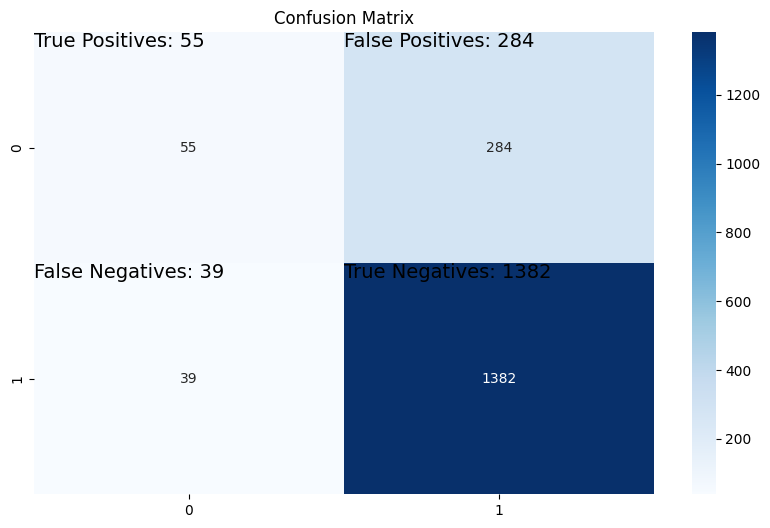

Precisión del modelo Asteroides:
0.5851
Precisión del modelo No asteroides:
0.8295
Exactitud del modelo:
0.8165
Sensibilidad del modelo Asteroides:
0.1622
Sensibilidad del modelo No asteroides:
0.9726
F1 Score del modelo Asteroides:
0.254
F1 Score del modelo No asteroides:
0.8954


In [99]:
minijuego_asteroides_sin_ajuste = analisis_metricas(Vars_Indep, Var_Dep)
minijuego_asteroides_sin_ajuste

### Regresión Logística Reponderación de Clases

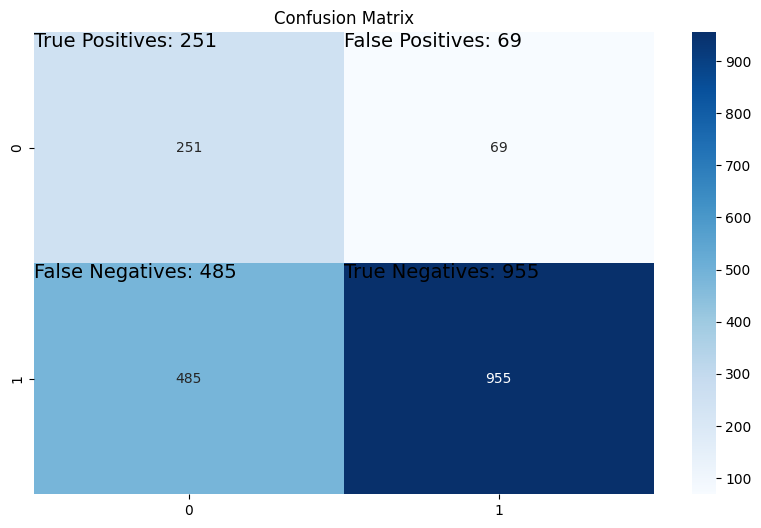

Precisión del modelo Asteroides:
0.341
Precisión del modelo No asteroides:
0.9326
Exactitud del modelo:
0.6852
Sensibilidad del modelo Asteroides:
0.7844
Sensibilidad del modelo No asteroides:
0.6632
F1 Score del modelo Asteroides:
0.4754
F1 Score del modelo No asteroides:
0.7752


In [100]:
minijuego_asteroides_reponderado = reponderacion_clases(Vars_Indep, Var_Dep)
minijuego_asteroides_reponderado

### Regresión Logística Oversampling

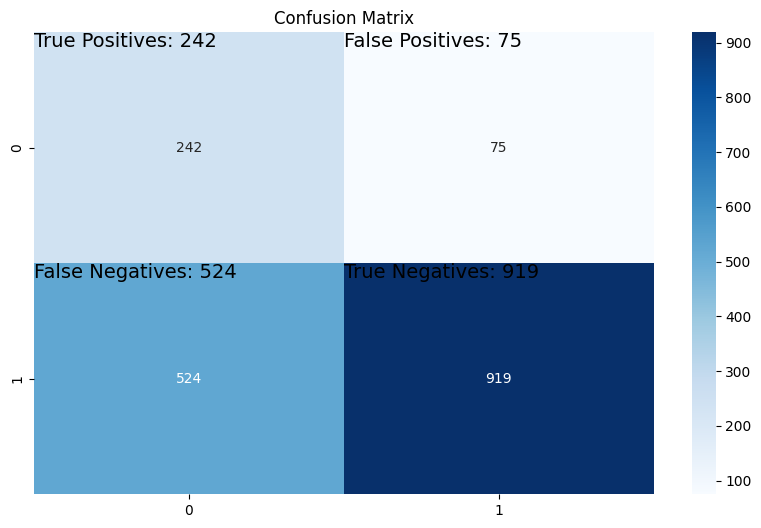

Precisión del modelo Asteroides:
0.3159
Precisión del modelo No asteroides:
0.9245
Exactitud del modelo:
0.6597
Sensibilidad del modelo Asteroides:
0.7634
Sensibilidad del modelo No asteroides:
0.6369
F1 Score del modelo Asteroides:
0.4469
F1 Score del modelo No asteroides:
0.7542


In [101]:
minijuego_asteroides_oversampling = oversampling(Vars_Indep, Var_Dep)
minijuego_asteroides_oversampling